<a href="https://colab.research.google.com/github/albr8407-cloud/Probabilidad-y-Estadistica/blob/main/UNIDAD1/PROU1_Practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad y estadistica
# Unidad 1
# Practica 6.  Estadística descriptiva del Dataset Autos
# Docente: Dr.Jose Gabriel Rodriguez Rivas
# Alumno: Bryan Arellano Perdue



 # 1- Carga del dataset de autos

In [83]:
# Cargar el archivo de autos2.csv

In [84]:
import pandas as pd

df = pd.read_csv("/content/autos2 (1).csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# 2- Estadisticas descriptivas y tendencia general

In [85]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")

precios = df["price"].dropna()

min_price = precios.min()
max_price = precios.max()
moda_price = precios.mode()[0]
media_price = precios.mean()
mediana_price = precios.median()
desv_price = precios.std()

print("Mínimo:", min_price)
print("Máximo:", max_price)
print("Moda:", moda_price)
print("Media:", media_price)
print("Mediana:", mediana_price)
print("Desviación estándar:", desv_price)

Mínimo: 5118.0
Máximo: 45400.0
Moda: 5572.0
Media: 13207.129353233831
Mediana: 10295.0
Desviación estándar: 7947.066341939271


# 3- Estadisticos y cuartiles

In [86]:
df["price"].describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


# 4- Regla de Sturges

In [87]:
n = precios.count()
bins_sturges = math.ceil(1 + 3.322 * math.log10(n))
print("Número óptimo de bins (Sturges):", bins_sturges)

Número óptimo de bins (Sturges): 9


# 5- Histograma de precios

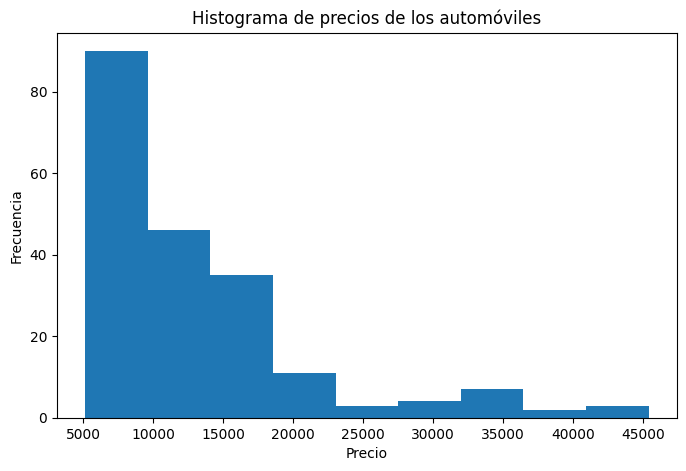

In [88]:
plt.figure(figsize=(8,5))
plt.hist(precios, bins=bins_sturges)
plt.title("Histograma de precios de los automóviles")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
## Se observa una cola hacia la derecha, lo que indica la presencia de pocos vehículos con precios muy altos.
## Esto provoca que la media sea mayor que la mediana.

In [89]:
## Conclusiones – Histograma de precios
## La mayoría de los automóviles se concentran en precios bajos y medios.
## Existe sesgo a la derecha debido a la presencia de vehículos de alto costo.

# 6- Diagrama de caja: Precio vs Tipo de vehiculo

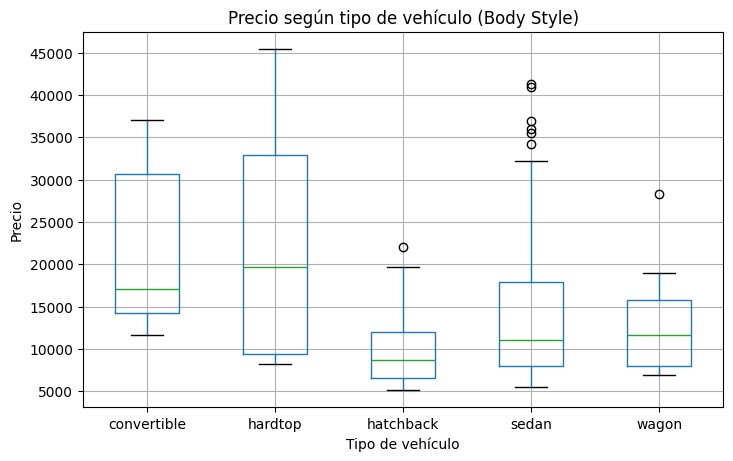

In [90]:
df.boxplot(column="price", by="body-style", figsize=(8,5))
plt.title("Precio según tipo de vehículo (Body Style)")
plt.suptitle("")
plt.xlabel("Tipo de vehículo")
plt.ylabel("Precio")
plt.show()

In [ ]:
## Los convertibles y hardtop presentan precios más elevados en comparación con sedanes y hatchbacks.
## Esto indica que el tipo de carrocería influye en el precio del automóvil.
## Se observan valores atípicos asociados a vehículos de mayor gama.

In [91]:
## Conclusiones – Precio vs Tipo de vehículo (Body Style)
##Los convertibles y hardtop son más caros que los sedanes y hatchbacks.
##Se observan valores atípicos asociados a autos de lujo.

 # 7- Diagrama de cajas: Precio vs tipo de traccion

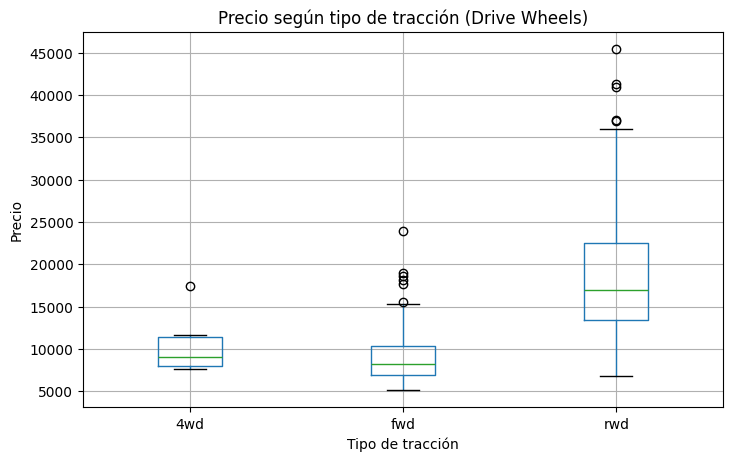

In [92]:
df.boxplot(column="price", by="drive-wheels", figsize=(8,5))
plt.title("Precio según tipo de tracción (Drive Wheels)")
plt.suptitle("")
plt.xlabel("Tipo de tracción")
plt.ylabel("Precio")
plt.show()

In [97]:
## Los vehículos con tracción trasera (RWD) tienden a tener precios mayores que los de tracción delantera (FWD).
## Esto sugiere que el tipo de tracción es un factor que influye en el costo del automóvil.

In [93]:
## Conclusiones – Precio vs Tracción (Drive Wheels)
##Los vehículos con tracción trasera presentan precios más elevados.
##Los de tracción delantera son los más económicos.

# Diagrama de caja: Precio vs ubicacion del motor

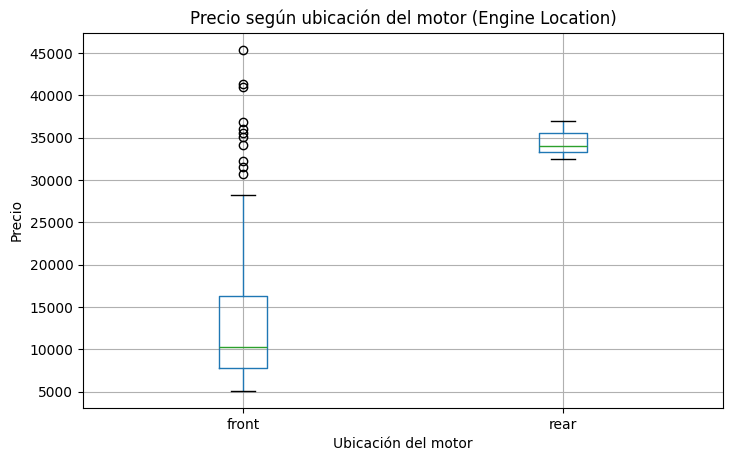

In [94]:
df.boxplot(column="price", by="engine-location", figsize=(8,5))
plt.title("Precio según ubicación del motor (Engine Location)")
plt.suptitle("")
plt.xlabel("Ubicación del motor")
plt.ylabel("Precio")
plt.show()

In [98]:
## Los automóviles con motor trasero presentan precios considerablemente más altos que los de motor delantero.
## Esto indica que la ubicación del motor se asocia con modelos más costosos o deportivos.

In [95]:
## Conclusiones – Precio vs Ubicación del motor (Engine Location)
##Los autos con motor trasero tienen precios considerablemente mayores.
##Los de motor delantero concentran la mayoría de los precios bajos y medios.

## Conclusiones Generales:
## El análisis de los precios de los automóviles muestra que existe una gran variación entre los vehículos económicos y los de lujo, lo cual se refleja en la diferencia entre el precio mínimo y máximo, así como en la desviación estándar. La comparación entre la media y la mediana indica que la distribución de los precios está sesgada a la derecha, ya que algunos autos con precios muy altos elevan el promedio, aunque la mayoría de los vehículos se concentran en rangos de precios bajos y medios.

## Las gráficas y diagramas de caja permitieron observar que el tipo de vehículo, el tipo de tracción y la ubicación del motor influyen en el precio final. En general, los autos con características más deportivas o de mayor desempeño tienden a ser más caros, mientras que los modelos más comunes presentan precios más accesibles. Además, se identificaron algunos valores atípicos, correspondientes a vehículos de lujo, que se alejan del comportamiento general del conjunto de datos.